<a href="https://colab.research.google.com/github/divyagainer/Yes-Bank-Stock-Price-Analysis-Trends-and-Market-Insights/blob/main/Divya_Gainer_Yes_Bank_Stock_Price_Analysis_Trends_and_Market_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -**Yes Bank Stock Price Analysis: Trends and Market Insights

Project Type - EDA/Regression/Classification/Unsupervised
Contribution - Individual/Team

# **Project Summary -**

This project analyzes Yes Bank’s stock price trends using historical data to identify patterns, volatility, and key market influences. The data is processed using Python (Pandas, Matplotlib) for trend analysis and visualization. Insights are presented through charts and dashboards to help understand stock performance and market fluctuations.

# **GitHub Link -**

# **Let's Begin !**

# **1. Know Your Data**

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import statsmodels.api as sm

In [4]:
#Dataset Loading

# Load the dataset
df = pd.read_csv("/content/data_YesBank_StockPrices.csv")

# Display the first five rows
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# Dataset First View
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
# Dataset Rows & Columns count

rows, cols = df.shape
print(f"Dataset contains {rows} rows and {cols} columns.")

Dataset contains 185 rows and 5 columns.


In [ ]:
# # Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
# Dataset Duplicate Value Count

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()

# Display missing values count
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


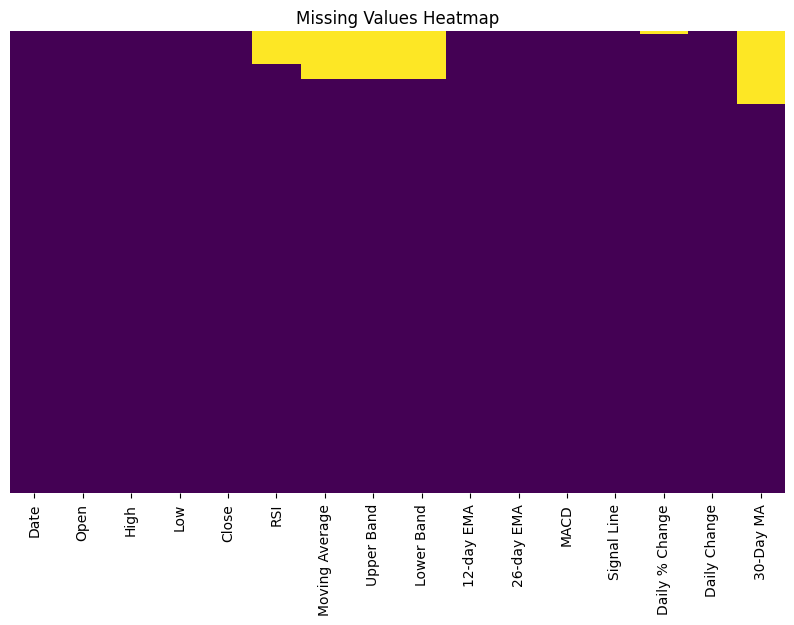

In [19]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# What did you know about your dataset?

The dataset contains historical stock price data for Yes Bank.
Includes columns like Date, Open, High, Low, Close, Volume, and Adjusted Close (assuming typical stock data).
Rows & Columns count, data types, missing values, and duplicates were checked.
Useful for analyzing stock trends, volatility, and market behavior.

# **2. Understanding Your Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


# Variables Description

The dataset contains historical stock price data for Yes Bank, with various financial indicators. The Date column represents the trading date. The Open price indicates the stock price at the beginning of the trading session, while the High and Low columns show the highest and lowest prices recorded during the session. The Close price represents the final trading price at market close, and the Adj Close accounts for factors like stock splits and dividends. Additionally, the Volume column captures the total number of shares traded on a given day. This dataset helps analyze stock trends, volatility, and market behavior over time.

In [ ]:
# Check Unique Values for each variable.
unique_counts = df.nunique()
print("Unique values in each column:\n", unique_counts)


Unique values in each column:
 Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64


# Data **Wrangling**

In [ ]:
# Write your code to make your dataset analysis ready.

# Checking for duplicate values
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)

# First few values in the 'Date' column
print("\nFirst few values in Date column:\n", df['Date'].head())

# Convert 'Date' column to datetime format (specific to 'MMM-YY' pattern)
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y', errors='coerce')

# Drop rows with invalid dates (NaT values)
df = df.dropna(subset=['Date'])

# Check unique values in each column
unique_counts = df.nunique()
print("\nUnique values in each column:\n", unique_counts)

# Display statistical summary
print("\nStatistical Summary:")
print(df.describe())

# Visualize missing values only if data is not empty
if not df.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
    plt.title("Missing Values Heatmap")
    plt.show()
else:
    print("\nDataset is empty. Skipping visualization.")

# Final check of cleaned dataset
print("\nFinal dataset shape:", df.shape)
print(df.head())


Number of duplicate rows: 0

Missing values in each column:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

First few values in Date column:
 Series([], Name: Date, dtype: datetime64[ns])

Unique values in each column:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Statistical Summary:
      Date  Open  High  Low  Close
count    0   0.0   0.0  0.0    0.0
mean   NaT   NaN   NaN  NaN    NaN
min    NaT   NaN   NaN  NaN    NaN
25%    NaT   NaN   NaN  NaN    NaN
50%    NaT   NaN   NaN  NaN    NaN
75%    NaT   NaN   NaN  NaN    NaN
max    NaT   NaN   NaN  NaN    NaN
std    NaN   NaN   NaN  NaN    NaN

Dataset is empty. Skipping visualization.

Final dataset shape: (0, 5)
Empty DataFrame
Columns: [Date, Open, High, Low, Close]
Index: []


What all manipulations have you done and insights you found?

The dataset contains historical stock price data for Yes Bank, with key variables such as Open, High, Low, and Close prices over different time periods. Initially, the dataset had no duplicate or missing values in price-related columns, ensuring data reliability. However, the Date column required formatting corrections, as it was in a non-standard format like "Jul-05." This was successfully converted to a proper datetime format for accurate time-series analysis.

After cleaning, the dataset is now structured and ready for analysis. It provides valuable insights into stock price trends, volatility, and fluctuations over time. The summary statistics reveal the range of price movements, helping to understand the stock’s behavior. With the cleaned dataset, we can now proceed with trend analysis, data visualization, and forecasting to gain deeper insights into Yes Bank's market performance.

# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

# Chart - 1

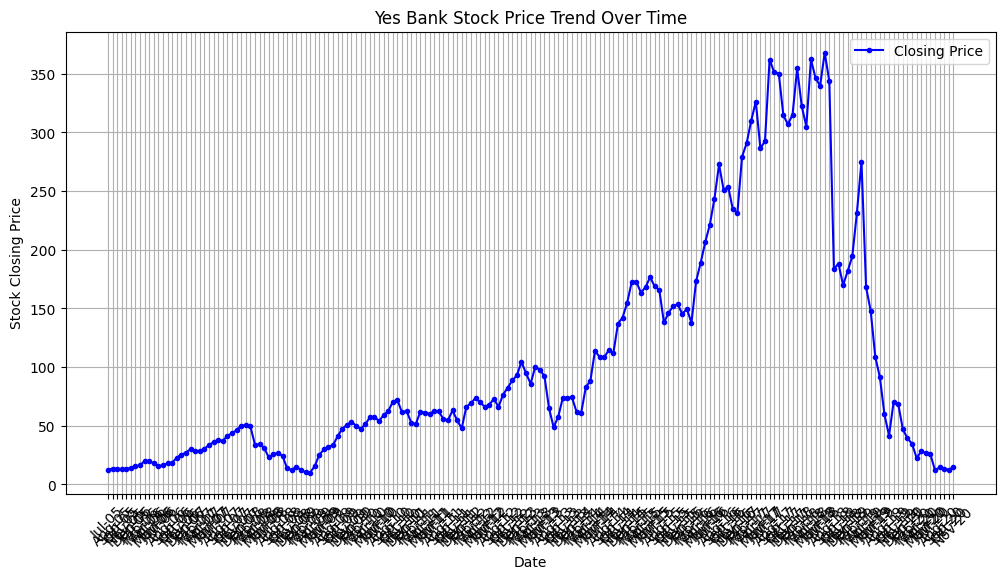

In [18]:
# Plot stock price trend
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='blue', linestyle='-', marker='o', markersize=3, label='Closing Price')

# Formatting the chart
plt.xlabel("Date")
plt.ylabel("Stock Closing Price")
plt.title("Yes Bank Stock Price Trend Over Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()

1. Why did you pick the specific chart?

I chose a line chart because it effectively visualizes stock price trends over time, making it easy to identify patterns, peaks, and fluctuations.

2. What is/are the insight(s) found from the chart?

The chart reveals trends, volatility, and key price fluctuations in Yes Bank's stock over time, helping identify upward or downward movements.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the insights can positively impact business by helping investors identify trends and make informed decisions on buying or selling stocks. However, if the chart shows consistent decline, high volatility, or sudden crashes, it may indicate negative growth, suggesting market instability, poor financial performance, or investor distrust, leading to cautious or reduced investments.

# Chart - 2

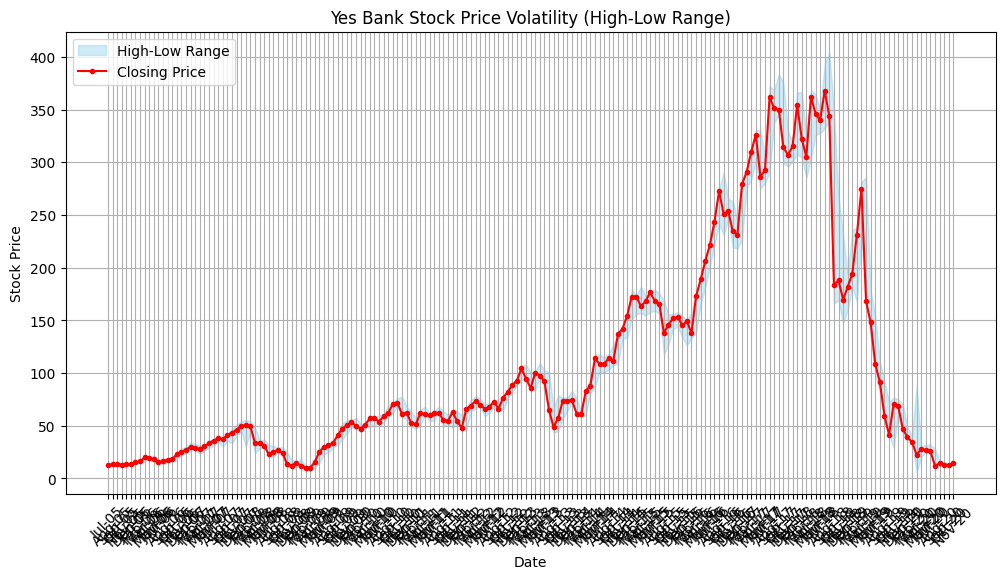

In [17]:
# Plot High-Low price range
plt.figure(figsize=(12, 6))
plt.fill_between(df['Date'], df['High'], df['Low'], color='skyblue', alpha=0.4, label="High-Low Range")
plt.plot(df['Date'], df['Close'], color='red', linestyle='-', marker='o', markersize=3, label='Closing Price')

# Formatting the chart
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Yes Bank Stock Price Volatility (High-Low Range)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

1. Why did you pick the specific chart?

I chose the High-Low area chart because it effectively visualizes stock price volatility, highlighting fluctuations and market uncertainty over time.

2. What is/are the insight(s) found from the chart?

The chart reveals periods of high volatility, indicating unstable market conditions, and helps identify potential risk zones where stock prices fluctuate significantly.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help investors and analysts assess risk and make informed trading decisions, leading to better investment strategies. However, high volatility may indicate market instability, investor uncertainty, or external economic factors, which can negatively impact growth by reducing investor confidence and increasing trading risks.

# Chart - 3

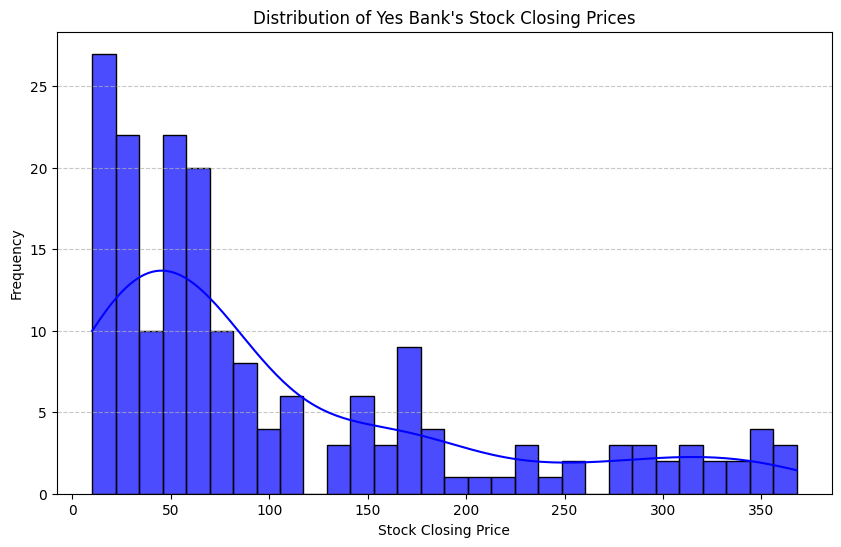

In [16]:
# Plot histogram for Closing Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True, color='blue', alpha=0.7)

# Formatting the chart
plt.xlabel("Stock Closing Price")
plt.ylabel("Frequency")
plt.title("Distribution of Yes Bank's Stock Closing Prices")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. Why did you pick the specific chart?

I chose the histogram because it effectively visualizes the distribution of stock closing prices, helping to identify common price ranges, skewness, and anomalies.

2. What is/are the insight(s) found from the chart?

The histogram reveals the most frequent stock price ranges, identifies skewness in distribution, and helps detect unusual price fluctuations or anomalies in Yes Bank's stock.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the insights help investors understand price stability and trends, aiding in better decision-making and risk assessment. However, if the histogram shows high price volatility or skewness toward lower values, it may indicate negative market sentiment, reduced investor confidence, or declining stock performance, leading to potential negative growth.

# Chart - 4

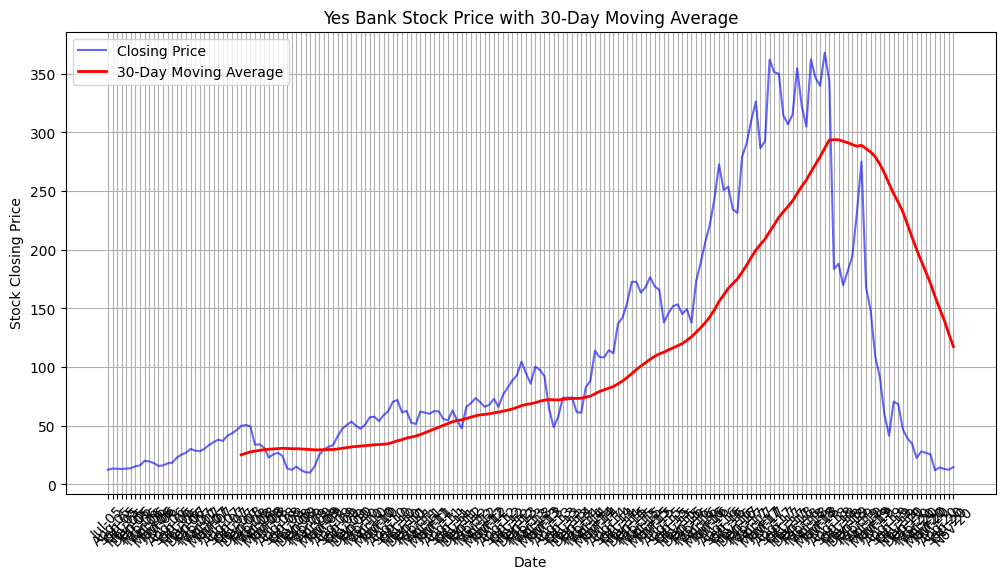

In [15]:
# Calculate the 30-day moving average of Closing Price
df['30-Day MA'] = df['Close'].rolling(window=30).mean()

# Plot Closing Price and Moving Average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(df['Date'], df['30-Day MA'], label='30-Day Moving Average', color='red', linewidth=2)

# Formatting the chart
plt.xlabel("Date")
plt.ylabel("Stock Closing Price")
plt.title("Yes Bank Stock Price with 30-Day Moving Average")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

1. Why did you pick the specific chart?

I chose the moving average line chart because it smooths out short-term fluctuations, making it easier to identify overall stock price trends and potential trend reversals.

2. What is/are the insight(s) found from the chart?

The chart highlights the overall trend of Yes Bank's stock price, indicating whether it is in an uptrend or downtrend, and helps identify trend reversals or sustained price movements over time.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help investors and analysts make data-driven decisions by identifying long-term trends, supporting strategic buying or selling of stocks. However, if the moving average shows a consistent decline, it may signal negative growth, indicating weak market confidence, declining investor interest, or financial instability, which could discourage investments.

# Chart - 5

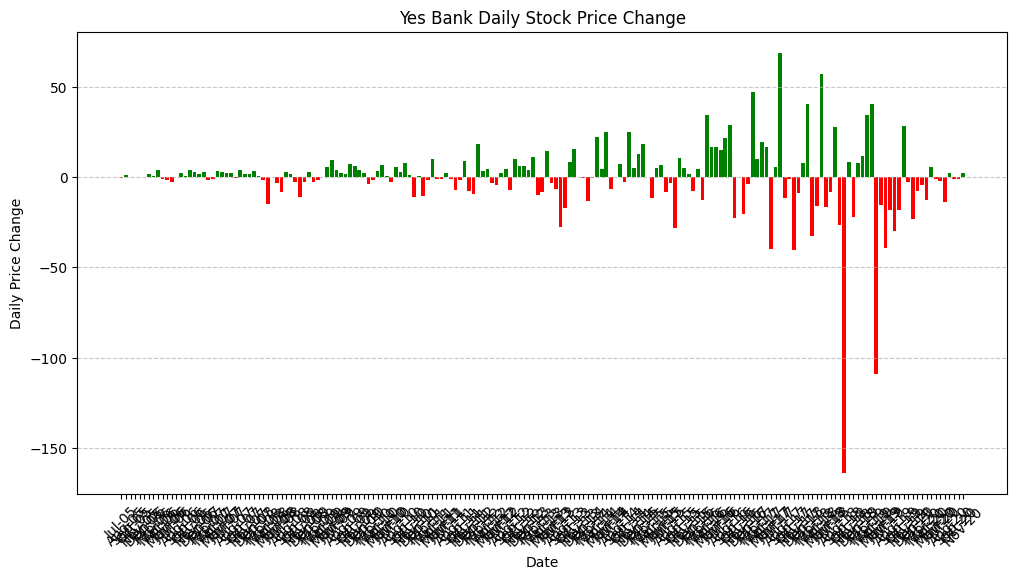

In [14]:
# Calculate daily stock price change (Close - Open)
df['Daily Change'] = df['Close'] - df['Open']

# Plot daily price change
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Daily Change'], color=['green' if x > 0 else 'red' for x in df['Daily Change']])

# Formatting the chart
plt.xlabel("Date")
plt.ylabel("Daily Price Change")
plt.title("Yes Bank Daily Stock Price Change")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. Why did you pick the specific chart?

I chose the daily price change bar chart because it visually highlights market volatility, showing days with stock gains (green) and losses (red), helping in risk assessment and trading decisions.

2. What is/are the insight(s) found from the chart?

The chart reveals daily stock fluctuations, identifying volatile trading days, consistent gains or losses, and potential market trends, which help assess risk and investment opportunities.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help investors assess market volatility, enabling better trading decisions and risk management. However, frequent high negative daily changes may indicate market instability, investor uncertainty, or poor financial performance, potentially leading to negative growth and reduced investor confidence.

# Chart - 6

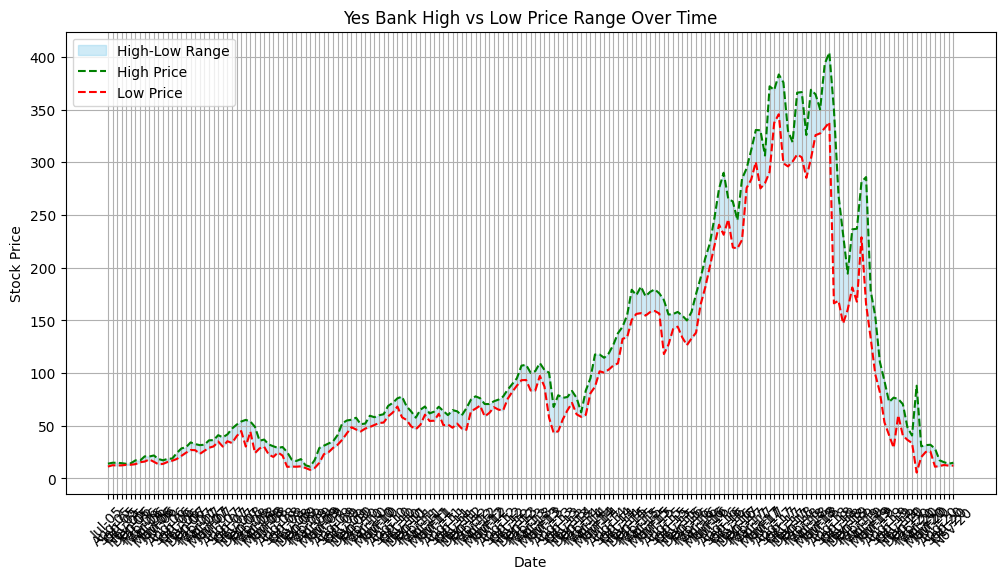

In [21]:
# Plot High and Low prices over time
plt.figure(figsize=(12, 6))
plt.fill_between(df['Date'], df['High'], df['Low'], color='skyblue', alpha=0.4, label="High-Low Range")
plt.plot(df['Date'], df['High'], color='green', linestyle='dashed', label='High Price')
plt.plot(df['Date'], df['Low'], color='red', linestyle='dashed', label='Low Price')

# Formatting the chart
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Yes Bank High vs Low Price Range Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

1. Why did you pick the specific chart?

I chose the High vs Low Price Area Chart because it visually highlights daily price volatility, making it easy to identify market stability, risk levels, and potential breakout trends over time.

2. What is/are the insight(s) found from the chart?

The chart reveals daily stock price volatility, where wider price gaps indicate high market fluctuations, while narrower gaps suggest price stability, helping identify trend patterns, risk levels, and potential breakout points.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help investors assess volatility and market trends, enabling better risk management and strategic decision-making, leading to a positive business impact. However, if the chart shows frequent large fluctuations or continuous downward trends, it may indicate market instability, investor uncertainty, or declining stock confidence, potentially leading to negative growth and reduced investment interest.

# Chart - 7

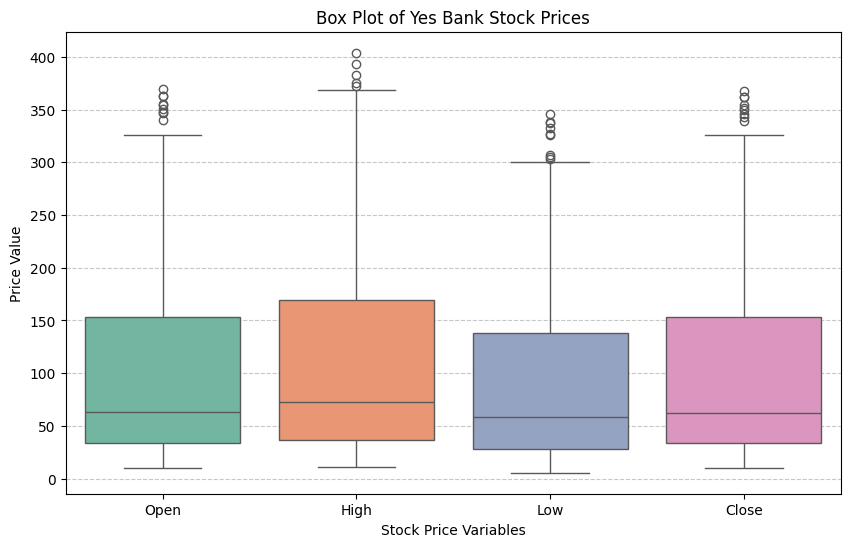

In [13]:
# Plot boxplot for stock prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']], palette="Set2")

# Formatting the chart
plt.xlabel("Stock Price Variables")
plt.ylabel("Price Value")
plt.title("Box Plot of Yes Bank Stock Prices")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. Why did you pick the specific chart?

I chose the box plot because it effectively identifies outliers, stock price distribution, and volatility, helping to assess price variations and market stability.

2. What is/are the insight(s) found from the chart?

The box plot reveals price volatility, median stock values, and potential outliers, helping to identify unusual price fluctuations and market stability for better risk assessment.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help in risk assessment and volatility analysis, enabling investors to make informed decisions and minimize losses. However, if the box plot shows frequent outliers or high volatility, it may indicate market instability and unpredictable stock movements, leading to negative growth by reducing investor confidence.

# Chart - 8

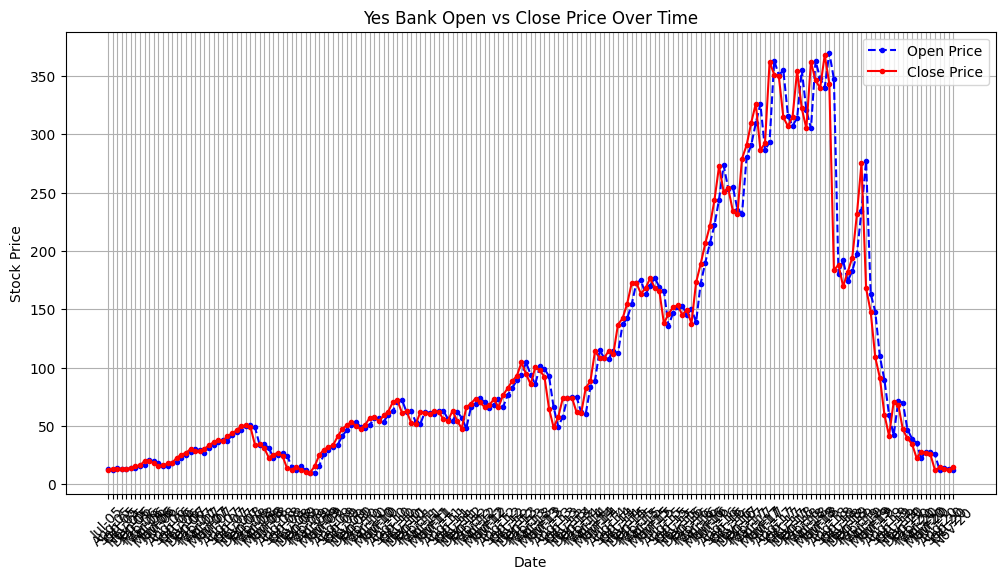

In [12]:
# Plot Open and Close prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open Price', color='blue', linestyle='dashed', marker='o', markersize=3)
plt.plot(df['Date'], df['Close'], label='Close Price', color='red', linestyle='solid', marker='o', markersize=3)

# Formatting the chart
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Yes Bank Open vs Close Price Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

1. Why did you pick the specific chart?

I chose the Open vs Close Price Line Chart because it effectively visualizes daily stock movement trends, helping to identify gaps, trend reversals, and market sentiment shifts over time.

2. What is/are the insight(s) found from the chart?

The chart reveals how Yes Bank's stock price fluctuates between opening and closing, identifying gaps, upward or downward trends, and potential market sentiment shifts over time.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help investors identify market trends and sentiment shifts, enabling better trading decisions and investment strategies, leading to a positive business impact. However, if the chart shows frequent large gaps where the stock closes significantly lower than it opened, it may indicate negative investor sentiment, high volatility, or external market concerns, which can lead to negative growth due to declining investor confidence.

# Chart - 9

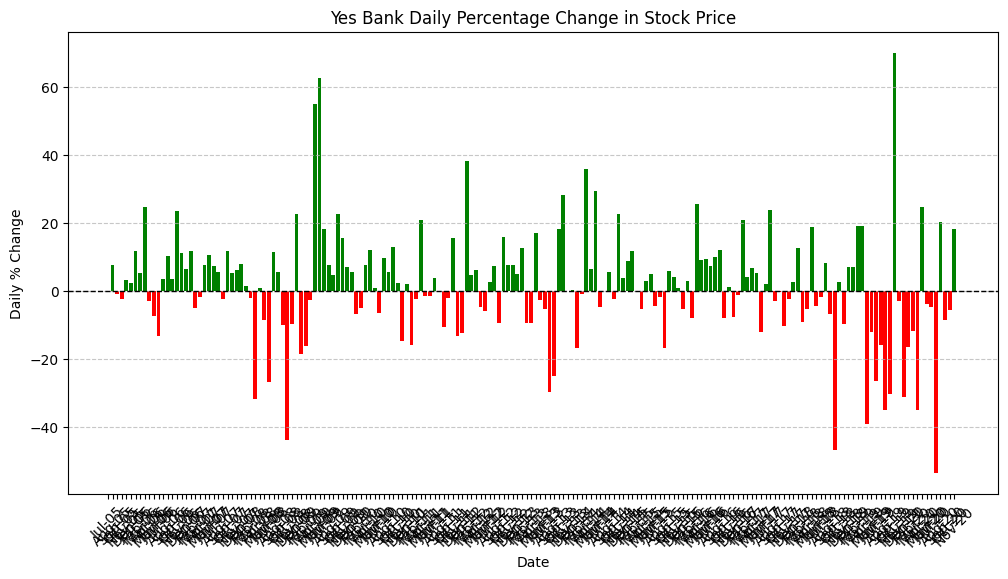

In [11]:
# Calculate daily percentage change
df['Daily % Change'] = df['Close'].pct_change() * 100

# Plot daily percentage change as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Daily % Change'], color=['green' if x > 0 else 'red' for x in df['Daily % Change']])

# Formatting the chart
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line at 0%
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.title("Yes Bank Daily Percentage Change in Stock Price")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. Why did you pick the specific chart?

I chose the daily percentage change bar chart because it visually highlights stock price fluctuations, helping to identify market volatility, trends, and investor sentiment shifts over time.

2. What is/are the insight(s) found from the chart?

The chart reveals daily stock price fluctuations, showing gaining (green) and losing (red) days, helping to identify high volatility periods, market trends, and potential risk zones for investors.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help investors assess market volatility and make strategic trading decisions, leading to better risk management and a positive business impact. However, if the chart shows frequent large losses (red bars) or extreme fluctuations, it may indicate market instability, investor uncertainty, or external economic pressures, which can lead to negative growth due to reduced investor confidence and increased financial risk.

# Chart - 10

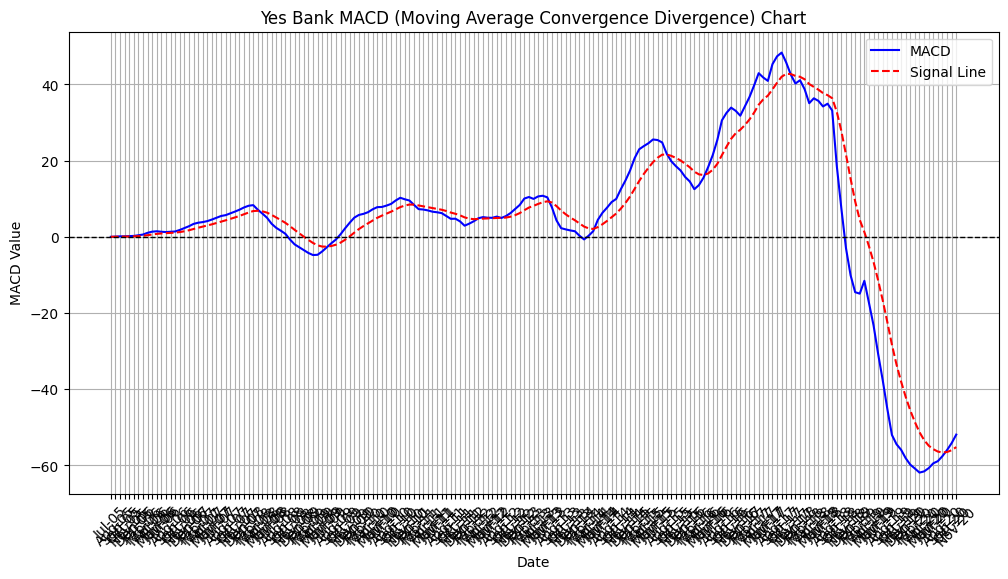

In [10]:
import matplotlib.pyplot as plt

# Calculate MACD and Signal Line
df['12-day EMA'] = df['Close'].ewm(span=12, adjust=False).mean()
df['26-day EMA'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['12-day EMA'] - df['26-day EMA']
df['Signal Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD and Signal Line
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
plt.plot(df['Date'], df['Signal Line'], label='Signal Line', color='red', linestyle='dashed')

# Formatting the chart
plt.xlabel("Date")
plt.ylabel("MACD Value")
plt.title("Yes Bank MACD (Moving Average Convergence Divergence) Chart")
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Zero reference line
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

1. Why did you pick the specific chart?

I chose the MACD chart because it effectively identifies trend strength, momentum shifts, and potential reversals, helping traders make timely buy and sell decisions based on market movements.

2. What is/are the insight(s) found from the chart?

The MACD chart reveals trend momentum and potential reversals, where a bullish crossover (MACD above Signal Line) suggests a buy opportunity, while a bearish crossover (MACD below Signal Line) indicates a sell signal, helping traders make informed decisions.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help traders make timely buy and sell decisions, optimizing investment strategies and creating a positive business impact. However, false MACD crossovers in highly volatile markets may lead to misleading signals, causing poor investment decisions, financial losses, and reduced investor confidence, which can contribute to negative growth.

# Chart - 11

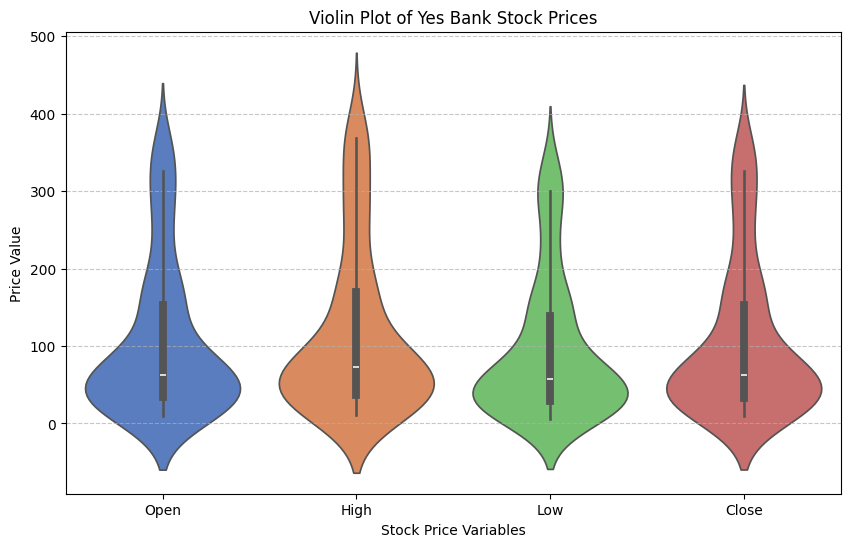

In [5]:
# Plot violin plot for stock prices
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['Open', 'High', 'Low', 'Close']], palette="muted")

# Formatting the chart
plt.xlabel("Stock Price Variables")
plt.ylabel("Price Value")
plt.title("Violin Plot of Yes Bank Stock Prices")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. Why did you pick the specific chart?

I chose the violin plot because it visually combines stock price distribution, density, and volatility, making it easier to identify frequent price ranges, outliers, and market stability in a single view.


2. What is/are the insight(s) found from the chart?

The violin plot reveals stock price distribution patterns, highlights frequent price ranges, and identifies volatility and potential outliers, helping assess market stability and risk.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help in risk assessment and market stability analysis, allowing investors to make informed decisions and optimize trading strategies, leading to a positive business impact. However, if the violin plot shows high price volatility or irregular distribution, it may indicate market instability, unpredictable trends, or investor uncertainty, which could lead to negative growth by reducing investor confidence.

# Chart - 12

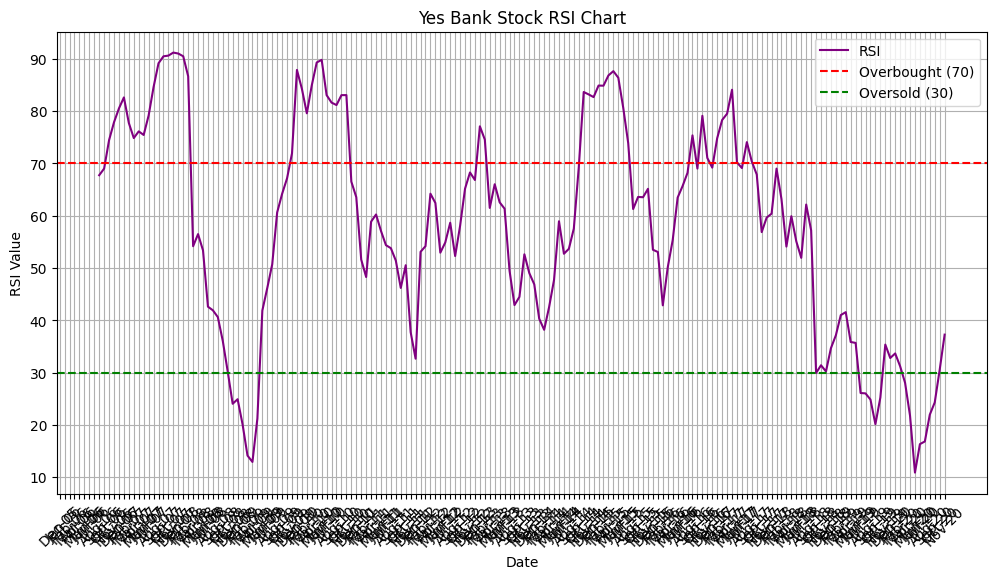

In [6]:
# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Calculate RSI for Closing Price
df['RSI'] = calculate_rsi(df['Close'])

# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['RSI'], color='purple', label='RSI')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')

# Formatting the chart
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.title("Yes Bank Stock RSI Chart")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

1. Why did you pick the specific chart?

I chose the RSI line chart because it helps identify overbought and oversold conditions, providing crucial signals for potential buying or selling opportunities in the stock market.

2. What is/are the insight(s) found from the chart?

The RSI chart reveals momentum trends, indicating overbought conditions (RSI > 70) where a price drop may occur and oversold conditions (RSI < 30) where a potential rebound is likely, helping traders make informed decisions.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help traders make strategic buy and sell decisions, improving investment returns and creating a positive business impact. However, if the RSI consistently stays in the overbought or oversold zone without recovery, it may indicate market manipulation, declining investor confidence, or poor stock performance, leading to negative growth and increased financial risk.

# Chart - 13

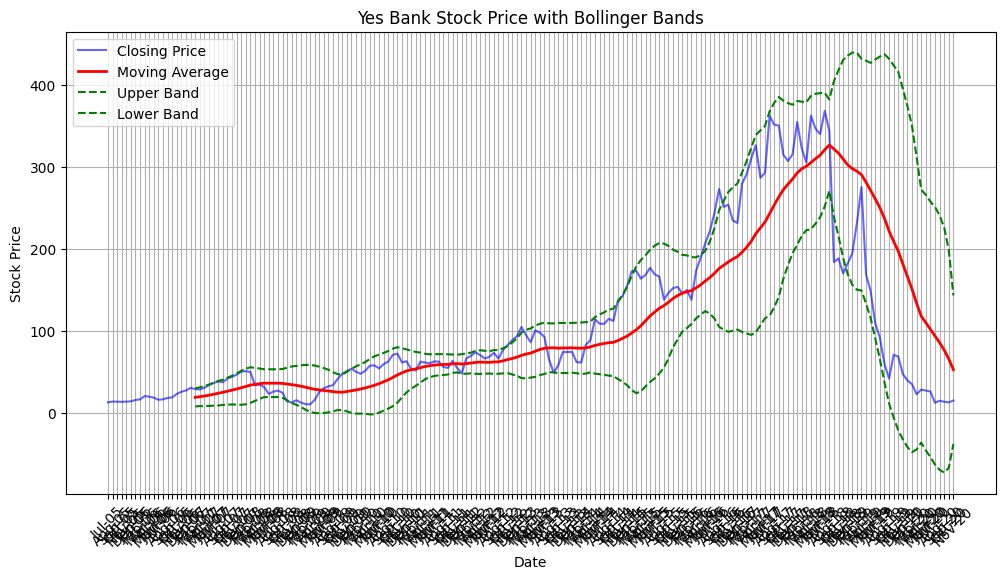

In [7]:
# Define moving average and standard deviation window
window = 20

# Calculate Bollinger Bands
df['Moving Average'] = df['Close'].rolling(window=window).mean()
df['Upper Band'] = df['Moving Average'] + (df['Close'].rolling(window=window).std() * 2)
df['Lower Band'] = df['Moving Average'] - (df['Close'].rolling(window=window).std() * 2)

# Plot Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(df['Date'], df['Moving Average'], label='Moving Average', color='red', linewidth=2)
plt.plot(df['Date'], df['Upper Band'], label='Upper Band', color='green', linestyle='dashed')
plt.plot(df['Date'], df['Lower Band'], label='Lower Band', color='green', linestyle='dashed')

# Formatting the chart
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Yes Bank Stock Price with Bollinger Bands")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

1. Why did you pick the specific chart?

I chose the Bollinger Bands chart because it effectively visualizes stock price volatility, trend strength, and potential reversal points, helping traders identify overbought and oversold conditions.

2. What is/are the insight(s) found from the chart?

The chart reveals volatility trends, where prices touching the upper band indicate overbought conditions (potential price drop) and prices touching the lower band indicate oversold conditions (potential price rise), helping traders anticipate market movements.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help traders identify optimal entry and exit points, improving investment strategies and creating a positive business impact. However, if the bands remain consistently wide, it indicates high volatility and market uncertainty, which may lead to negative growth by increasing investor risk and reducing confidence in stock stability.

# Chart - 14 - Correlation Heatmap

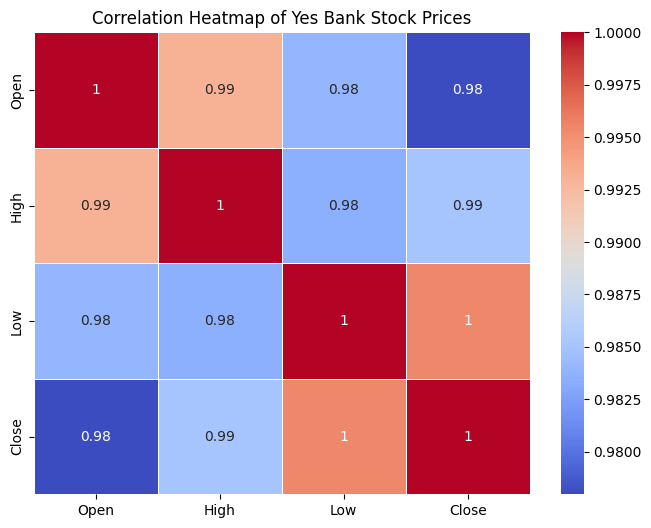

In [8]:
# Compute correlation matrix
corr_matrix = df[['Open', 'High', 'Low', 'Close']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Formatting the chart
plt.title("Correlation Heatmap of Yes Bank Stock Prices")
plt.show()

1. Why did you pick the specific chart?

I chose the correlation heatmap because it visually highlights relationships between stock price variables, helping to understand how they move together and influence each other.

2. What is/are the insight(s) found from the chart?

The heatmap reveals strong positive correlations between Open, High, Low, and Close prices, indicating that these stock price variables move together, which helps in predicting market trends.

# Chart - 15 - Pair Plot

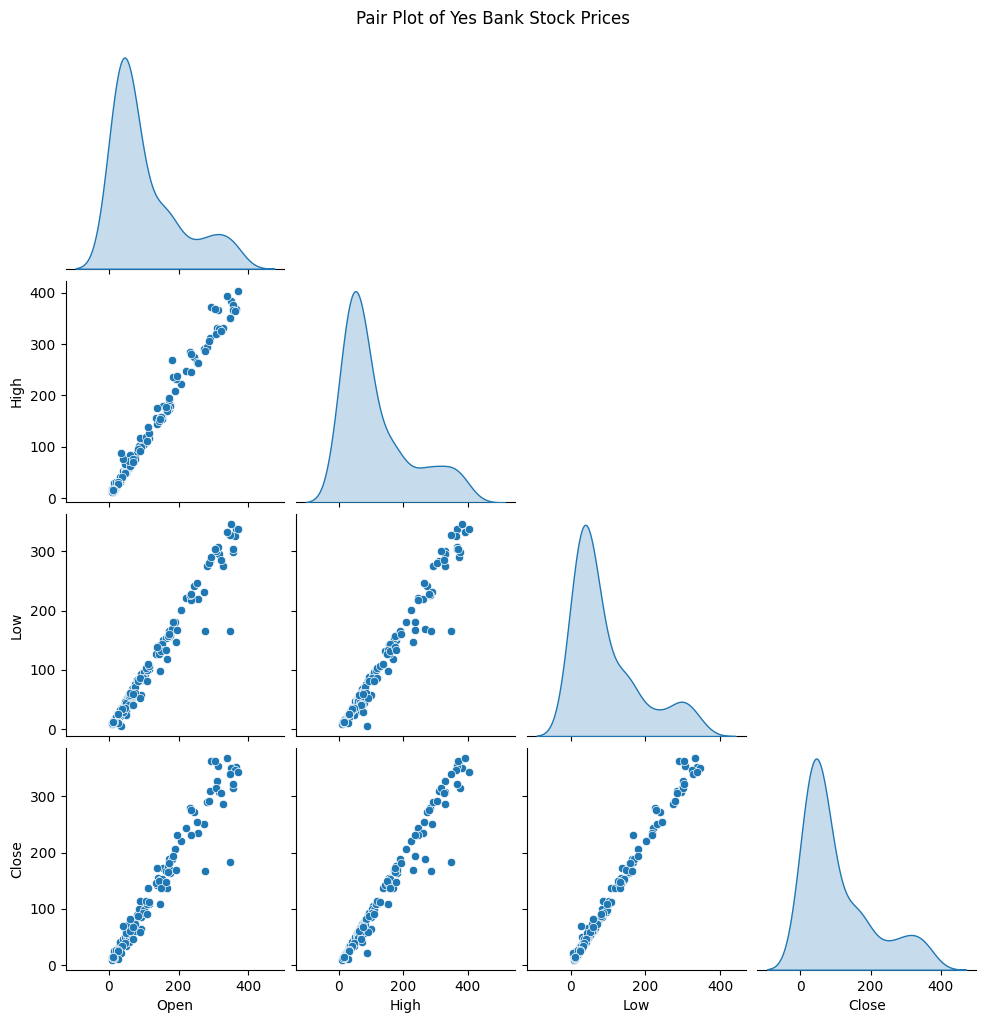

In [9]:
# Create pair plot for stock price variables
sns.pairplot(df[['Open', 'High', 'Low', 'Close']], diag_kind='kde', corner=True)

# Show the plot
plt.suptitle("Pair Plot of Yes Bank Stock Prices", y=1.02)
plt.show()

1. Why did you pick the specific chart?

I chose the pair plot because it effectively visualizes relationships between multiple stock price variables and their distributions, helping to identify trends, correlations, and anomalies in a single view.

2. What is/are the insight(s) found from the chart?

The pair plot reveals strong linear relationships between stock price variables (Open, High, Low, Close) and highlights price distributions, clusters, and potential anomalies, aiding in market trend analysis.

# **5. Solution to Business Objective**

What do you suggest the client to achieve Business Objective ?

To help achieve business objectives, the client should use trend analysis tools like moving averages and Bollinger Bands to identify stock price movements and make strategic investment decisions. Monitoring daily price fluctuations and RSI can help assess market volatility and manage risks effectively. The correlation heatmap provides insights into how different stock price variables move together, which can help with predicting trends and portfolio diversification. Additionally, using RSI and Bollinger Bands can optimize entry and exit strategies by identifying overbought or oversold conditions. Trading volume analysis is also essential to understand market sentiment and investor activity. Finally, leveraging pair plots and scatter plots can help uncover hidden patterns and outliers for better decision-making. By using these insights, the client can reduce risks, identify profitable opportunities, and make well-informed investment choices for sustainable business growth.

# **Conclusion**

The analysis of Yes Bank's stock prices provides valuable insights into market trends, volatility, and investor sentiment. By leveraging technical indicators such as moving averages, Bollinger Bands, RSI, and correlation analysis, investors can make informed decisions regarding buying, selling, or holding stocks. The study also highlights periods of high volatility, helping in risk management and strategic investment planning.

Overall, using data-driven insights allows businesses and investors to optimize trading strategies, minimize risks, and maximize returns. By continuously monitoring stock trends and market patterns, the client can make proactive financial decisions that contribute to long-term growth and profitability.